<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/mason_drain_flow_response_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Created on August 20, 2024

Purpose: Superimpose all Mason Creek gauge readings to determine lag & response time of drain.

Timeframe: __ --> until August 20th.

In [2]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd # to work with dataframe
import os # for file paths
import glob # read in a folder of csv
import numpy as np # basic statistics
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
## -------------------- ##
##  Mason Flow Files    ##
## -------------------- ##

phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason/mason_flow_response/mason_gauges/Mason Creek  at Phyllis.csv')

marble = pd.read_csv('/content/drive/MyDrive/Data/Mason/mason_flow_response/mason_gauges/Mason Creek Marble front Rd.csv')

madison = pd.read_csv('/content/drive/MyDrive/Data/Mason/mason_flow_response/mason_gauges/Mason Creek at Madison.csv')

northside = pd.read_csv('/content/drive/MyDrive/Data/Mason/mason_flow_response/mason_gauges/Mason Creek at Ustick and Northside.csv')

usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason/mason_flow_response/mason_gauges/mason_usgs.csv')
usgs.rename(columns={
    'X_00060_00003': 'Flow',
    'Date': 'Time',
    # Add more column renames as needed
}, inplace=True)

In [9]:
# Function to create a new DataFrame with daily averages
def create_gauge_df(df, gauge_name, time_column='Time', flow_column='Flow'):
    df[time_column] = pd.to_datetime(df[time_column])
    df.set_index(time_column, inplace=True)
    df_daily = df.resample('D').mean()  # Resample by day and calculate the mean
    df_daily.reset_index(inplace=True)
    df_daily['Gauge'] = gauge_name
    df_daily = df_daily[['Gauge', time_column, flow_column]]
    df_daily.columns = ['Gauge', 'Date', 'Flow']  # Rename columns
    return df_daily

# Create a DataFrame for each gauge
phyllis_df = create_gauge_df(phyllis, 'Phyllis')
marble_df = create_gauge_df(marble, 'Marble')
madison_df = create_gauge_df(madison, 'Madison')
northside_df = create_gauge_df(northside, 'Northside')

# Combine all DataFrames into a single DataFrame
ethos_df = pd.concat([phyllis_df, marble_df, madison_df, northside_df])

In [10]:
## -------------------- ##
##  Mason USGS Gauge    ##
## -------------------- ##

# Prepare the USGS DataFrame similarly
usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason/mason_flow_response/mason_gauges/mason_usgs.csv')
usgs.rename(columns={'X_00060_00003': 'Flow'}, inplace=True)

usgs['Gauge'] = 'USGS'
usgs['Date'] = pd.to_datetime(usgs['Date']).dt.date

# add to gauge df
final_df = pd.concat([ethos_df, usgs])
final_df.to_csv('final_df.csv')

   Unnamed: 0 agency_cd   site_no        Date  Flow X_00060_00003_cd  \
0           1      USGS  13210980  2024-03-31  43.3                P   
1           2      USGS  13210980  2024-04-01  42.0                P   
2           3      USGS  13210980  2024-04-02  42.5                P   
3           4      USGS  13210980  2024-04-03  46.5                P   
4           5      USGS  13210980  2024-04-04  62.4                P   

                DiversionName Gauge  
0  MASON CREEK AT CALDWELL ID  USGS  
1  MASON CREEK AT CALDWELL ID  USGS  
2  MASON CREEK AT CALDWELL ID  USGS  
3  MASON CREEK AT CALDWELL ID  USGS  
4  MASON CREEK AT CALDWELL ID  USGS  


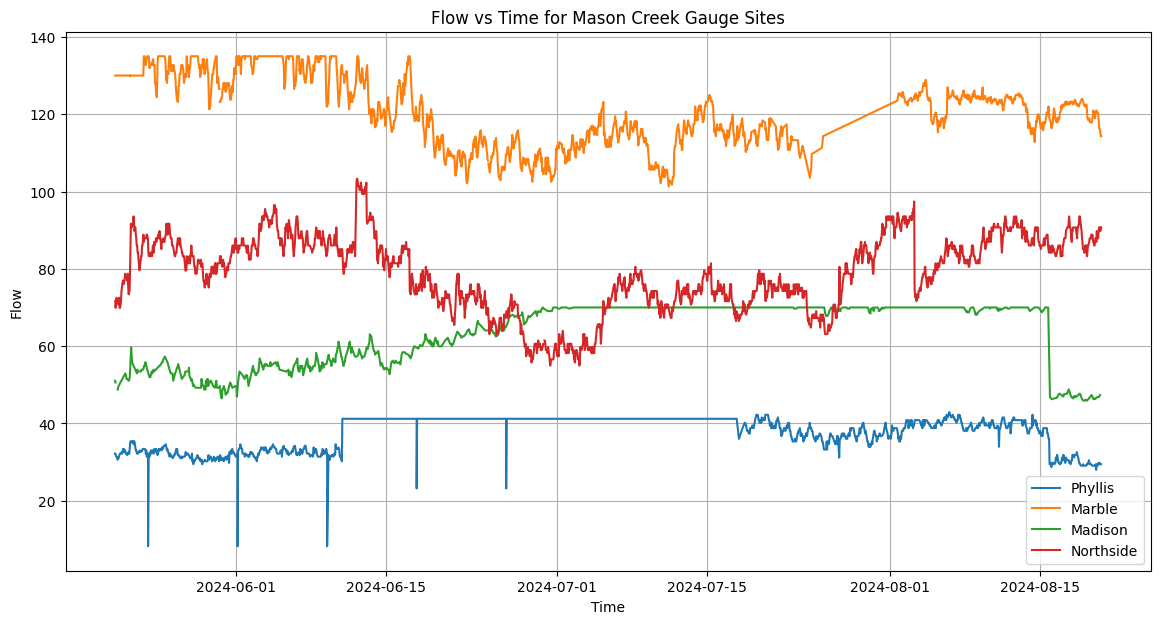

In [ ]:
## -------------------- ##
##  Superimposed Plot   ##
## -------------------- ##

# (Ethos Gauges only)

# Function to prepare data (convert 'Time' to datetime and set as index)
def prepare_data(df, time_column='Time', flow_column='Flow'):
    df[time_column] = pd.to_datetime(df[time_column], errors='coerce')
    df.set_index(time_column, inplace=True)
    return df[[flow_column]]

# Prepare each dataset
phyllis_prepared = prepare_data(phyllis)
marble_prepared = prepare_data(marble)
madison_prepared = prepare_data(madison)
northside_prepared = prepare_data(northside)

plt.figure(figsize=(14, 7))

plt.plot(phyllis_prepared, label='Phyllis')
plt.plot(marble_prepared, label='Marble')
plt.plot(madison_prepared, label='Madison')
plt.plot(northside_prepared, label='Northside')

plt.title('Flow vs Time for Mason Creek Gauge Sites')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.legend()
plt.grid(True)

plt.show()

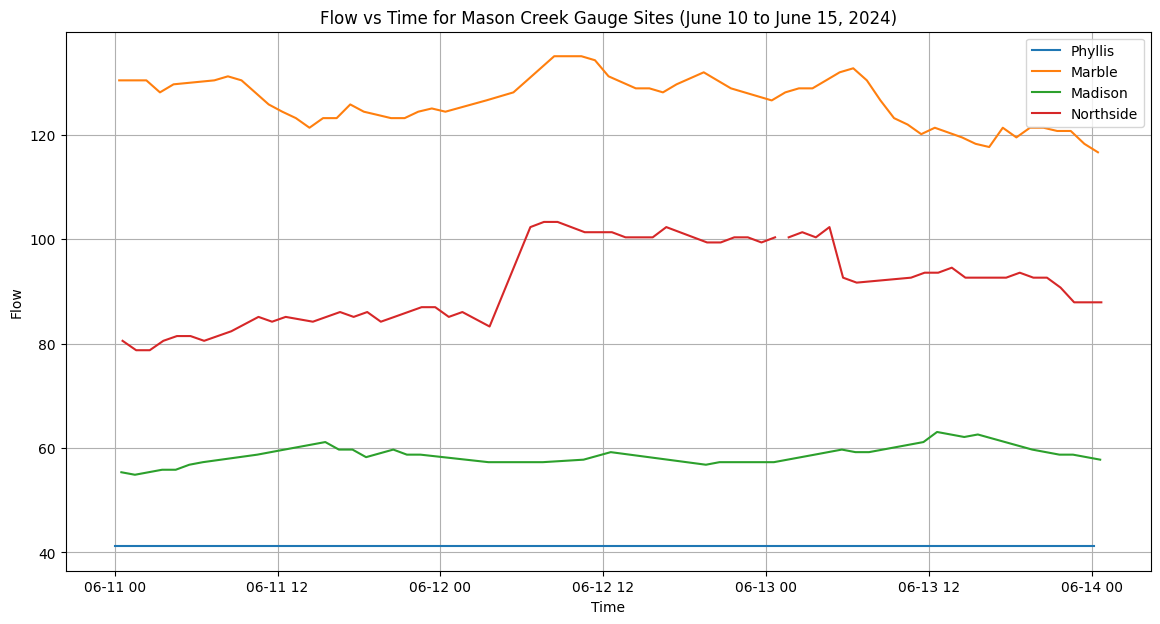

In [ ]:
## --------------------------------------- ##
##  Superimposed Plot of Continuous Data   ##
## --------------------------------------- ##

# ethos gauges only

# Define the date range:
start_date = '2024-06-11 00:00:00'
end_date = '2024-06-14 1:00:00'

# Function to prepare data (convert 'Time' to datetime and set as index)
def prepare_data(df, time_column='Time', flow_column='Flow'):
    df[time_column] = pd.to_datetime(df[time_column], errors='coerce')  # Coerce errors in datetime conversion
    df.set_index(time_column, inplace=True)
    return df[[flow_column]]

# Prepare each dataset
phyllis_prepared = prepare_data(phyllis)
marble_prepared = prepare_data(marble)
madison_prepared = prepare_data(madison)
northside_prepared = prepare_data(northside)

# Filter the data for the specific date range
phyllis_filtered = phyllis_prepared[start_date:end_date]
marble_filtered = marble_prepared[start_date:end_date]
madison_filtered = madison_prepared[start_date:end_date]
northside_filtered = northside_prepared[start_date:end_date]

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(phyllis_filtered, label='Phyllis')
plt.plot(marble_filtered, label='Marble')
plt.plot(madison_filtered, label='Madison')
plt.plot(northside_filtered, label='Northside')

plt.title('Flow vs Time for Mason Creek Gauge Sites')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.legend()
plt.grid(True)

plt.show()

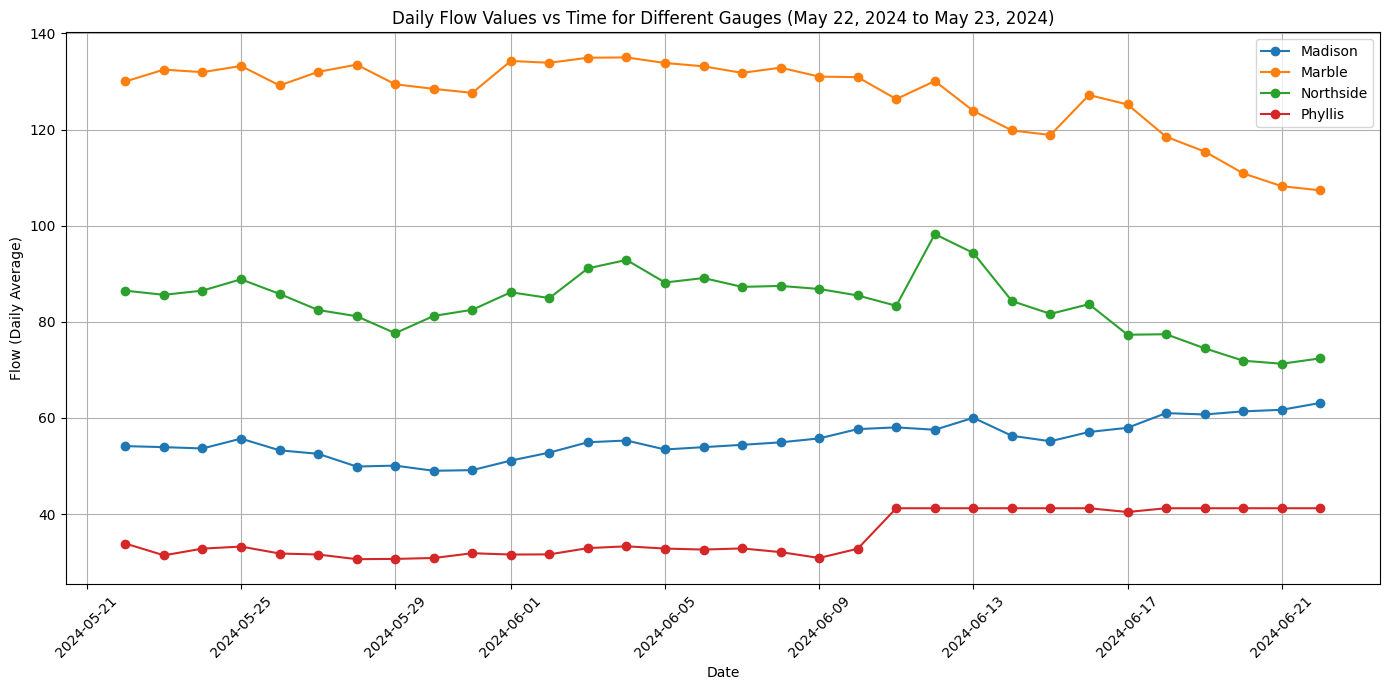

In [30]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##
df = pd.read_csv('/content/final_df.csv')

date_column_name = 'Date'  # Replace with the exact column name if different
df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')

# specify date range
start_date = '2024-05-22 00:00:00'
end_date = '2024-06-22 01:00:00'
filtered_df = df[(df[date_column_name] >= start_date) & (df[date_column_name] <= end_date)]

# get mean for each day
filtered_df.set_index(date_column_name, inplace=True)
daily_df = filtered_df.groupby('Gauge').resample('D').mean().reset_index()


plt.figure(figsize=(14, 7))

for gauge in daily_df['Gauge'].unique():
    gauge_data = daily_df[daily_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', label=gauge)

plt.title('Daily Flow Values vs Time for Different Gauges (May 22, 2024 to May 23, 2024)')
plt.xlabel('Date')
plt.ylabel('Flow (Daily Average)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

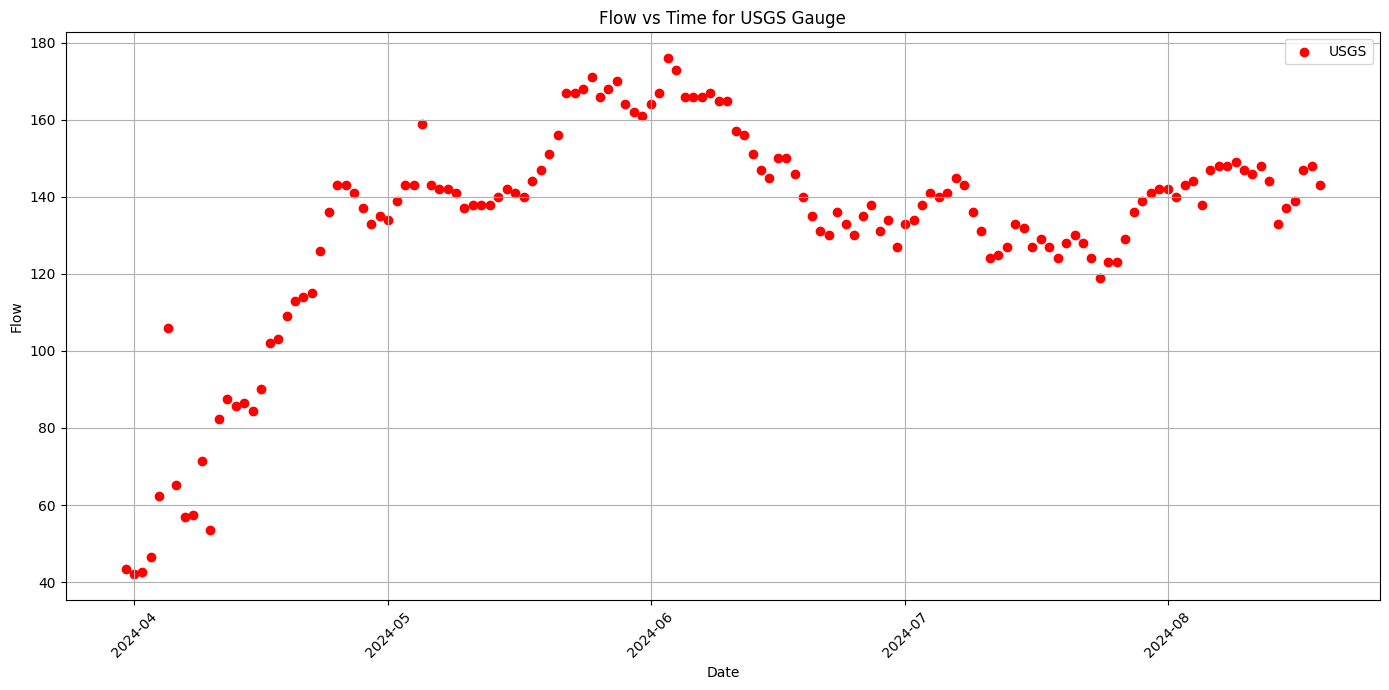

In [36]:
# Scatter plot of USGS data
plt.figure(figsize=(14, 7))
plt.scatter(usgs['Date'], usgs['Flow'], color='r', marker='o', label='USGS')

plt.title('Flow vs Time for USGS Gauge')
plt.xlabel('Date')
plt.ylabel('Flow')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()